In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import os

def DSC(data1, data2, label):
    im1 = data1 == label
    im2 = data2 == label
    intersection = np.logical_and(im1, im2)
    if im1.sum() + im2.sum() == 0:
        return 1 if intersection.sum() == 0 else 0
    dsc = 2 * intersection.sum()/ (im1.sum() + im2.sum())
    return dsc

labels = [1,3]
model_tested = os.listdir('/data/asilvani/inference222')
testlabels = os.listdir('/data/asilvani/testlabels_iasdilated_uncropped')
scores =  {label: [] for label in labels}
study_ids = set()
for file in model_tested:
    for f in testlabels:
        if file == f: 
            path1 = os.path.join('/data/asilvani/inference222', file)
            path2= os.path.join('/data/asilvani/testlabels_iasdilated_uncropped', f)
            img1 = nib.load(path1)
            img2 = nib.load(path2)
            data1 = img1.get_fdata()
            data1[(data1==2)|(data1==4)] = 1
            data2 = img2.get_fdata()
            data2[(data2==2)|(data2==4)] = 1

            study_id = f.split('_')[1]
            study_ids.add(study_id)
        

            for label in labels:
                score = DSC(data1, data2, label)
                scores[label].append(score)
                print(f"{study_id} scores are {score} for label {label}.")

                

bav001.nii.gz scores are 0.6451331529478781 for label 1.
bav001.nii.gz scores are 0.8591851385725301 for label 3.
bav003.nii.gz scores are 0.7466654554813704 for label 1.
bav003.nii.gz scores are 0.9152569346085905 for label 3.
bav009.nii.gz scores are 0.6857200576280017 for label 1.
bav009.nii.gz scores are 0.8296681473500637 for label 3.
bav010.nii.gz scores are 0.7138762326466876 for label 1.
bav010.nii.gz scores are 0.9357365989001667 for label 3.
bav013.nii.gz scores are 0.6991636307660731 for label 1.
bav013.nii.gz scores are 0.9176974296473652 for label 3.
bav016.nii.gz scores are 0.7327227581715309 for label 1.
bav016.nii.gz scores are 0.8925081194955672 for label 3.
bav031.nii.gz scores are 0.7352227584184285 for label 1.
bav031.nii.gz scores are 0.8862334975329645 for label 3.
bav032.nii.gz scores are 0.7064976638158214 for label 1.
bav032.nii.gz scores are 0.8873573214479835 for label 3.
bav037.nii.gz scores are 0.677937046612266 for label 1.
bav037.nii.gz scores are 0.92239

In [2]:
print(np.mean(scores[1]))
# print(np.mean(trimmed_means[1]))
print(np.std(scores[3]))
# print(np.mean(trimmed_means[3]))

0.6779440278490776
0.06334251549536268


In [3]:
from scipy import stats
inter_dsc = [0.554142, 0.509364, 0.424556, 0.571096, 0.51414, 0.629996, 0.678142]

print(stats.mannwhitneyu(np.mean(scores[1]), np.mean(inter_dsc)))


KeyboardInterrupt: 

In [6]:
import matplotlib as mpl
from matplotlib import font_manager
font_manager.get_font_names()


AttributeError: module 'matplotlib.font_manager' has no attribute 'get_font_names'

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

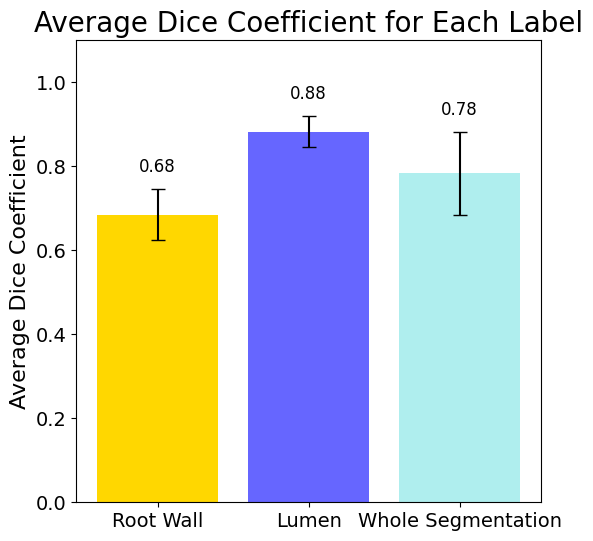

In [4]:
def trimmed_mean(data, trim_percentage=2.5):
    # Calculate the number of points to trim from each end
    trim_count = int(len(data) * (trim_percentage / 100))

    # Sort the data
    sorted_data = np.sort(data)

    # Trim the data
    trimmed_data = sorted_data[trim_count:-trim_count]

    # Calculate and return the mean of the trimmed data
    return trimmed_data

trimmed_means = {label: trimmed_mean(scores[label]) for label in labels}

import matplotlib as mpl
from matplotlib import font_manager
mpl.rcParams['font.family'] = 'Arial'  # sets the default font family
mpl.rcParams['font.size'] = 14   
label_names = {1: 'Root Wall', 3: 'Lumen'}
labels = list(scores.keys())
#colors = ['red', '#5DF246', 'b', 'gold', 'skyblue']
colors = ['gold', '#6666FF', 'paleturquoise']


avg_scores = [np.mean(trimmed_means[label]) for label in labels]
label_std = [np.std(trimmed_means[label])for label in labels]
overall_avg = np.mean(avg_scores)
overall_std = np.std(avg_scores)
label_texts = [label_names[label] for label in labels]
label_texts.append('Whole Segmentation')
avg_scores.append(overall_avg)
label_std.append(overall_std)
plt.figure(figsize=(6, 6))
bars = plt.bar(label_texts, avg_scores, color=colors, yerr= label_std, capsize=5)

plt.ylabel('Average Dice Coefficient', family='sans-serif', fontsize = 16)
plt.title('Average Dice Coefficient for Each Label', family='sans-serif',  fontsize = 20)
for bar, err in zip(bars, label_std):
    yval = bar.get_height()
    error = err
    plt.text(bar.get_x() + bar.get_width()/2, yval + error + 0.03, round(yval, 2), va='bottom', ha='center', fontsize=12, color='black')

plt.ylim([0, 1.1])  
plt.show()


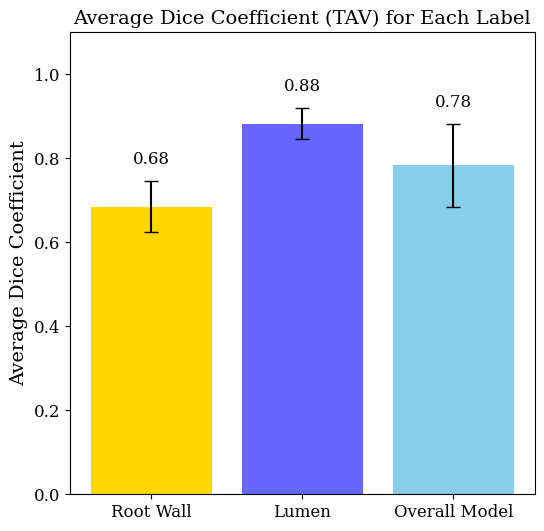

In [4]:
def trimmed_mean(data, trim_percentage=2.5):
    # Calculate the number of points to trim from each end
    trim_count = int(len(data) * (trim_percentage / 100))

    # Sort the data
    sorted_data = np.sort(data)

    # Trim the data
    trimmed_data = sorted_data[trim_count:-trim_count]

    # Calculate and return the mean of the trimmed data
    return trimmed_data

trimmed_means = {label: trimmed_mean(scores[label]) for label in labels}

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'  # sets the default font family
mpl.rcParams['font.size'] = 12   
label_names = {1: 'Root Wall', 3: 'Lumen'}
labels = list(scores.keys())
#colors = ['red', '#5DF246', 'b', 'gold', 'skyblue']
colors = ['gold', '#6666FF', 'skyblue']


avg_scores = [np.mean(trimmed_means[label]) for label in labels]
label_std = [np.std(trimmed_means[label])for label in labels]
overall_avg = np.mean(avg_scores)
overall_std = np.std(avg_scores)
label_texts = [label_names[label] for label in labels]
label_texts.append('Overall Model')
avg_scores.append(overall_avg)
label_std.append(overall_std)
plt.figure(figsize=(6, 6))
bars = plt.bar(label_texts, avg_scores, color=colors, yerr= label_std, capsize=5)

plt.ylabel('Average Dice Coefficient', family='serif', fontsize = 14)
plt.title('Average Dice Coefficient (TAV) for Each Label', family='serif',  fontsize = 14)
for bar, err in zip(bars, label_std):
    yval = bar.get_height()
    error = err
    plt.text(bar.get_x() + bar.get_width()/2, yval + error + 0.03, round(yval, 2), va='bottom', ha='center', fontsize=12, color='black')

plt.ylim([0, 1.1])  
plt.show()


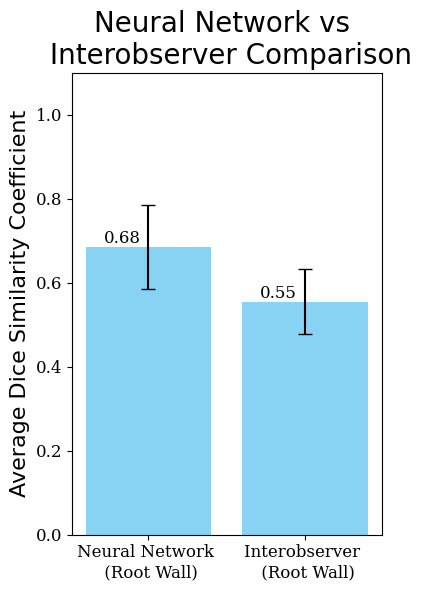

In [5]:

new = ['Neural Network \n (Root Wall)', 'Interobserver \n (Root Wall)']
colors = ['#88D3F3', '#88D3F3']
new_graph = [avg_scores[0]]
new_graph.append(0.5544908571428573)
new_std = label_std.copy()
new_std.append(0.07728812162186849)
plt.figure(figsize=(4, 6))
bars = plt.bar(new, new_graph, color=colors, yerr=new_std[-2:], capsize=5)
# plt.xlabel('Neural Network Model and Interobserver', family='serif', fontsize = 14)
plt.ylabel('Average Dice Similarity Coefficient', family='sans-serif', fontsize = 16)
plt.title('Neural Network vs \n Interobserver Comparison', family='sans-serif',  fontsize = 20)
for bar, err in zip(bars, new_std[-2:]):
    yval = bar.get_height()
    error = err
    plt.text(bar.get_x() + 0.23, yval, round(yval, 2), va='bottom', ha='center', fontsize=12, color='black')

plt.ylim([0, 1.1])  
plt.show()

In [8]:
print(new_graph[0])
print(new_graph[1])

0.6849553106477907
0.5544908571428573


TtestResult(statistic=nan, pvalue=nan, df=0)


/home/asilvani/.conda/envs/silvani_cudnn3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/asilvani/.conda/envs/silvani_cudnn3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


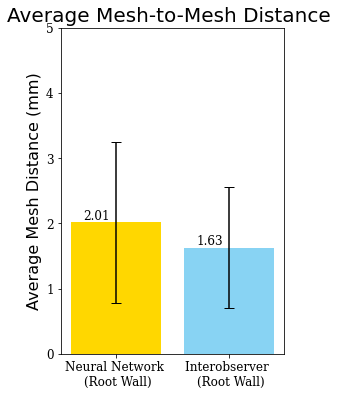

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'  # sets the default font family
mpl.rcParams['font.size'] = 12   

avg_scores = [2.013231266191707, 1.6264005714285712]
colors = ['gold', '#88D3F3']
label_texts = ['Neural Network \n (Root Wall)', 'Interobserver \n (Root Wall)']

error= [1.2398115385500472, 0.9242270663638512]
plt.figure(figsize=(4, 6))
bars = plt.bar(label_texts, avg_scores, color=colors, yerr = error, capsize = 5)
#plt.xlabel('Model and Interobserver', family='serif', fontsize = 14)
plt.ylabel('Average Mesh Distance (mm)', family='arial', fontsize = 16)
plt.title('Average Mesh-to-Mesh Distance ', family='arial',  fontsize = 20)
for bar, err in zip(bars, error):
    yval = bar.get_height()
    error = err
    plt.text(bar.get_x() + 0.23, yval, round(yval, 2), va='bottom', ha='center', fontsize=12, color='black')

plt.ylim([0, 5])  
plt.show()

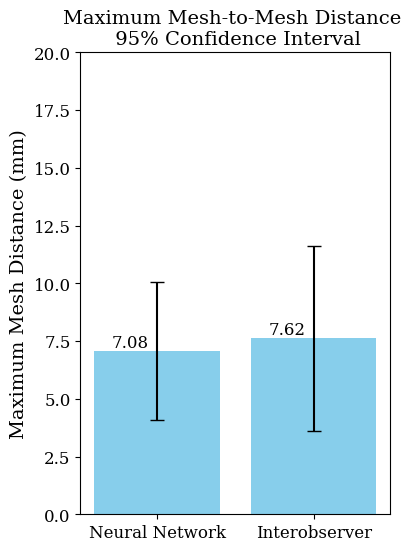

In [17]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'  # sets the default font family
mpl.rcParams['font.size'] = 12   

avg_scores = [7.081590715258855, 7.617250714285713]
error = [ 2.9925524855241425, 4.015744218840325]
label_texts = ['Neural Network', 'Interobserver']


plt.figure(figsize=(4, 6))
bars = plt.bar(label_texts, avg_scores, color='skyblue', yerr= error, capsize = 5)
#plt.xlabel('Model and Interobserver', family='serif', fontsize = 14)
plt.ylabel('Maximum Mesh Distance (mm)', family='serif', fontsize = 14)
plt.title('Maximum Mesh-to-Mesh Distance \n 95% Confidence Interval', family='serif',  fontsize = 14)
for bar, err in zip(bars, error):
    yval = bar.get_height()
    error = err
    plt.text(bar.get_x() + 0.23, yval, round(yval, 2), va='bottom', ha='center', fontsize=12, color='black')

plt.ylim([0, 20])  
plt.show()

In [12]:
import shutil
import os
import nibabel as nib
import numpy as np
from scipy.ndimage import binary_dilation, binary_erosion
import re
def extract_study_ids(files):
    return {f[6:12] for f in files}  # Adjust the slice if necessary

train_ids = extract_study_ids(os.listdir('/data/asilvani/nnUNet_silvani/nnUNet_raw/Dataset888_AorticRoot/labelsTr'))
test_ids = extract_study_ids(os.listdir('/data/asilvani/testlabels_iasdilated_cropped'))
filepath = '/data/asilvani/newdata_uncropped'
for file in os.listdir(filepath):
    if file.endswith('nii.gz'):
        img = nib.load(filepath + "/" + file)
        data  = img.get_fdata()
        newdata = data.copy()
        newdata[(newdata==1)|(newdata==2)|(newdata==3)]=0
        s = (3, 3, 3)
        dilated_ias = binary_dilation(newdata==4, structure=np.ones(s), iterations =2)
        dilated_ias = dilated_ias.astype(data.dtype)
        dilated_ias[(data==0)|(data ==3)] = 0
        data[dilated_ias ==1] = 4
        nii2 = nib.Nifti1Image(data, img.affine)
        study_id = file[6:12]
        print(study_id)
        frame = file.split('_')[0][3:5]
        if study_id in train_ids:
            nib.save(nii2, f'/data/asilvani/nnUNet_silvani/nnUNet_raw/Dataset222_AorticRoot/labelsTr/img{frame}_{study_id}.nii.gz')
            print(f'done {file} as training')
        if study_id in test_ids:
            nib.save(nii2, f'/data/asilvani/testlabels_iasdilated_uncropped/img{frame}_{study_id}.nii.gz')
            print(f'done {file} as testing')
        
# image_path = '/data/asilvani/newdata_uncropped'
# target_path = '/data/asilvani/nnUNet_silvani/nnUNet_raw/Dataset222_AorticRoot/imagesTs'
# for file in os.listdir(image_path):
#     study_id = file.split('_')[2]
#     frame = file.split('_')[3][1:3]
#     old_path = os.path.join(image_path, file)
#     new_path = os.path.join(target_path, f'img{frame}_{study_id}_0000.nii.gz')
#     shutil.copy2(old_path, new_path)

    

bav001
done seg01_bav001_LAS.nii.gz as testing
bav002
done seg01_bav002_LAS.nii.gz as training
bav003
done seg01_bav003_LAS.nii.gz as testing
bav004
done seg01_bav004_LAS.nii.gz as training
bav007
done seg01_bav007_LAS.nii.gz as training
bav008
done seg01_bav008_LAS.nii.gz as training
bav009
done seg01_bav009_LAS.nii.gz as testing
bav010
done seg01_bav010_LAS.nii.gz as testing
bav011
done seg01_bav011_LAS.nii.gz as training
bav012
done seg01_bav012_LAS.nii.gz as training
bav013
done seg01_bav013_LAS.nii.gz as testing
bav016
done seg01_bav016_LAS.nii.gz as testing
bav018
done seg01_bav018_LAS.nii.gz as training
bav026
done seg01_bav026_LAS.nii.gz as training
bav030
done seg01_bav030_LAS.nii.gz as training
bav031
done seg01_bav031_LAS.nii.gz as testing
bav032
done seg01_bav032_LAS.nii.gz as testing
bav033
done seg01_bav033_LAS.nii.gz as training
bav034
done seg01_bav034_LAS.nii.gz as training
bav035
done seg01_bav035_LAS.nii.gz as training
bav036
done seg01_bav036_LAS.nii.gz as training


In [13]:
import shutil
def extract_study_ids(files):
    return {f[6:12] for f in files} 
test_ids = extract_study_ids(os.listdir('/data/asilvani/testlabels_iasdilated_cropped'))

for file in os.listdir('/data/asilvani/nnUNet_silvani/nnUNet_raw/Dataset222_AorticRoot/imagesTr'):
    if file.split('_')[1] in test_ids: 
        oldpath = os.path.join('/data/asilvani/nnUNet_silvani/nnUNet_raw/Dataset222_AorticRoot/imagesTr', file)
        newpath = os.path.join('/data/asilvani/3DTEEtestimages', file)
        shutil.move(oldpath, newpath)

In [36]:
### orientation metric (calculate cases of similarity between STJ, LVO in automatic vs semi-automated 
### aortic root segmentations 

def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    if norm_v1 == 0 or norm_v2 == 0:
        return 0  # To handle cases where a vector might be zero
    similarity = dot_product / (norm_v1 * norm_v2)
    return similarity

import numpy as np
import nibabel as nib
from scipy.linalg import lstsq
from sklearn.decomposition import PCA

def find_pca_vectors(segmented_image):
    # This function assumes segmented_image is a labeled image array where each unique non-zero value represents a different segment
    vectors = {}
    labels = np.unique(segmented_image)
    labels = labels[(labels == 1)|(labels == 2)]  # Exclude background if it's labeled as 0

    for label in labels:
        # Extract coordinates of the current segment
        coords = np.column_stack(np.where(segmented_image == label))

        # Apply PCA
        pca = PCA(n_components=min(3, len(coords)))  # At most 3 components, but not more than the number of points
        pca.fit(coords)

        # Store the first principal component vector
        vectors[label] = pca.components_[2]  # Assuming the first component is the primary direction

    return vectors

img = nib.load('/data/asilvani/testlabels_iasdilated_uncropped/img01_bav001.nii.gz')
data = img.get_fdata()
direction_vectors = find_pca_vectors(data)

for label, vector in direction_vectors.items():
    print(f"Label {label}: Primary direction vector {vector}")


Label 1.0: Primary direction vector [0.98372132 0.1402322  0.11237122]
Label 2.0: Primary direction vector [-0.99440658 -0.07781357 -0.07141849]


-0.9971563062245121


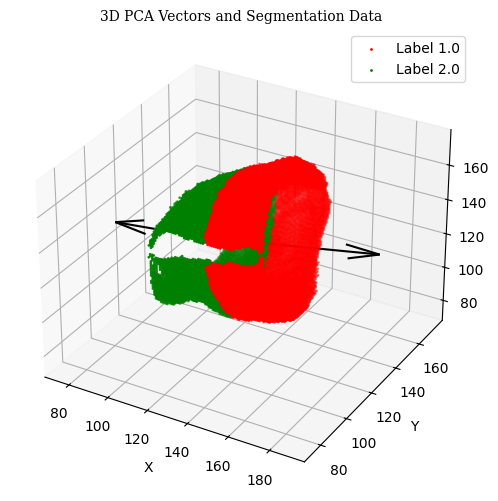

In [46]:
print(cosine_similarity(direction_vectors[1], direction_vectors[2]))
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
def plot_pca_vectors_and_data_in_3d(data, vectors, labels_to_show=[1,2]):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the data points for each label
    labels = np.unique(data)
    colors = {1: 'red', 2: 'g'}  # Use a colormap to distinguish labels
    
    for i, label in enumerate(labels):
        if label == 0:
            continue  # Skip the background\
        if label in labels_to_show:
            coords = np.column_stack(np.where(data == label))
            ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color=colors[i], s=1, label=f'Label {label}')
        

    for label, vector in direction_vectors.items():
        centroid = np.mean(np.column_stack(np.where(data == label)), axis=0)
        vector_scaled = vector * 50  

        ax.quiver(centroid[0], centroid[1], centroid[2],
                  vector_scaled[0], vector_scaled[1], vector_scaled[2],
                  color='black', length=np.linalg.norm(vector_scaled), normalize=True)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(70, data.shape[0] - 30)
    ax.set_ylim(70, data.shape[1] - 30)
    ax.set_zlim(70, data.shape[2] - 30)
    ax.set_title('3D PCA Vectors and Segmentation Data', font='serif')
    ax.legend()
    plt.show()


plot_pca_vectors_and_data_in_3d(data, direction_vectors)



In [ ]:
import matplotlib.pyplot as plt
filtered_df['frame']= filtered_df['filename'].str.split('_').str[0].str[3:5].astype(int)
colors = [
    ((filtered_df['frame'] < 4) | (filtered_df['frame'] > 22), 'skyblue', 'Diastole'),
    ((filtered_df['frame'] >= 4) & (filtered_df['frame'] <= 22), 'salmon', 'Systole')
]
plt.figure(figsize=(10, 3))
for condition, color, label in colors:
    subset = filtered_df[condition]
    plt.bar(subset['frame'], subset['root_volume'], color=color, label=label)

#plt.bar(filtered_df['frame'], filtered_df['root_volume'], color=colors)
plt.xlabel('Frame', font='serif')
plt.ylabel(f'Root Volume (cm$^3$)', font='serif')
plt.ylim(20, 45)
plt.title('Aortic Root Volume Through Cardiac Cycle', font='serif')
plt.legend()